<a href="https://colab.research.google.com/github/Ritesh055/Explainable-AI/blob/main/XAI_Morphed_Image_Attack_Detection_by_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.5 MB/s eta 0:00:00


In [3]:
from tensorflow import keras
import keras
import tensorflow.keras as K
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D
import cv2

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [5]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/LARGE_DATASET/train',
    labels='inferred',
    label_mode='int',
    class_names=['unmorphed','morphed'],
    color_mode='rgb',
    image_size=(224,224),
    shuffle=True
)

Found 2463 files belonging to 2 classes.


In [6]:
X=[]
y=[]
for images,labels in ds.take(-1):
    for i in range(images.shape[0]):
        X.append(images[i].numpy().astype("uint8"))
        y.append(labels[i].numpy().astype("uint8"))
X=np.array(X)
y=np.array(y)

In [7]:
X.shape

(2463, 224, 224, 3)

In [8]:
X_train=X[:2000]
y_train=y[:2000]
X_test=X[2000:]
y_test=y[2000:]

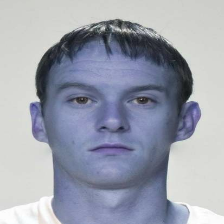

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_train[0])

In [10]:
img_test_image = cv2.imread("/content/drive/MyDrive/LARGE_DATASET/train/morphed/011_03_014_03_alpha0.5_combined_morph_q64.jpg")
img_test_image = cv2.resize(img_test_image,(224,224))

img_test_image.shape

(224, 224, 3)

In [11]:
#build the model
effnet = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model1 = effnet.output
model = GlobalAveragePooling2D()(model1)
model = Dropout(0.5)(model)
model = Dense(4, activation='softmax')(model)
model = Model(inputs=effnet.input, outputs=model)

27018416/27018416 [==============================] - 0s 0us/step


In [12]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer="adam", 
    metrics=["accuracy"]
)

In [13]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
63/63 [==============================] - 91s 341ms/step - loss: 0.1797 - accuracy: 0.9360
Epoch 2/5
63/63 [==============================] - 21s 341ms/step - loss: 0.0250 - accuracy: 0.9935
Epoch 3/5
63/63 [==============================] - 22s 345ms/step - loss: 0.0282 - accuracy: 0.9900
Epoch 4/5
63/63 [==============================] - 22s 349ms/step - loss: 0.0134 - accuracy: 0.9945
Epoch 5/5
63/63 [==============================] - 22s 352ms/step - loss: 0.0295 - accuracy: 0.9935


In [14]:
y_pred=model.predict(X_train)
for idx,label in enumerate(y_train):
  print("Actual : ",label," Predicted : ",np.argmax(y_pred[idx]))

63/63 [==============================] - 9s 81ms/step
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  0
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  0
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  0
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  0
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted :  0
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  1  Predicted :  1
Actual :  0  Predicted

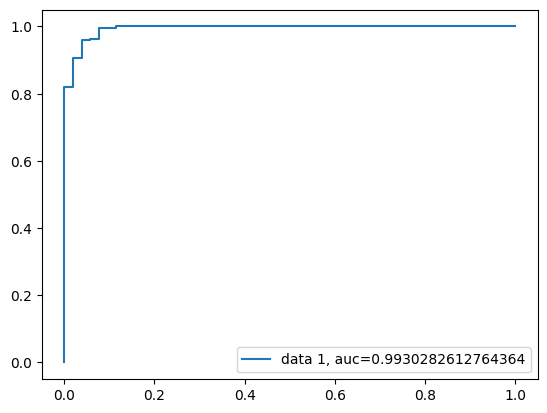

In [15]:
from sklearn import svm, metrics
import matplotlib.pyplot as plt

y_pred_proba = model.predict_on_batch(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 4s 127ms/step - loss: 0.2622 - accuracy: 0.9244


[0.2621559202671051, 0.9244060516357422]

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

#**XAI - Gradcam**

In [22]:
def VizGradCAM(model, image, interpolant=0.5, plot_results=True):

    """VizGradCAM - Displays GradCAM based on Keras / TensorFlow models
    using the gradients from the last convolutional layer. This function
    should work with all Keras Application listed here:
    https://keras.io/api/applications/
    Parameters:
    model (keras.model): Compiled Model with Weights Loaded
    image: Image to Perform Inference On
    plot_results (boolean): True - Function Plots using PLT
                            False - Returns Heatmap Array
    Returns:
    Heatmap Array?
    """
    #sanity check
    assert (interpolant > 0 and interpolant < 1), "Heatmap Interpolation Must Be Between 0 - 1"
    #STEP 1: Preprocesss image and make prediction using our model
    #input image
    original_img = np.asarray(image, dtype = np.float32)
    #expamd dimension and get batch size
    img = np.expand_dims(original_img, axis=0)
    #predict
    prediction = model.predict(img)
    #prediction index
    prediction_idx = np.argmax(prediction)
    #STEP 2: Create new model
    #specify last convolutional layer
    last_conv_layer = next(x for x in model.layers[::-1] if isinstance(x, K.layers.Conv2D))
    target_layer = model.get_layer(last_conv_layer.name)
    #compute gradient of top predicted class
    with tf.GradientTape() as tape:
        #create a model with original model inputs and the last conv_layer as the output
        gradient_model = Model([model.inputs], [target_layer.output, model.output])
        #pass the image through the base model and get the feature map  
        conv2d_out, prediction = gradient_model(img)
        #prediction loss
        loss = prediction[:, prediction_idx]
    #gradient() computes the gradient using operations recorded in context of this tape
    gradients = tape.gradient(loss, conv2d_out)
    #obtain the output from shape [1 x H x W x CHANNEL] -> [H x W x CHANNEL]
    output = conv2d_out[0]
    #obtain depthwise mean
    weights = tf.reduce_mean(gradients[0], axis=(0, 1))
    #create a 7x7 map for aggregation
    activation_map = np.zeros(output.shape[0:2], dtype=np.float32)
    #multiply weight for every layer
    for idx, weight in enumerate(weights):
        activation_map += weight * output[:, :, idx]
    #resize to image size
    activation_map = cv2.resize(activation_map.numpy(), 
                                (original_img.shape[1], 
                                 original_img.shape[0]))
    #ensure no negative number
    activation_map = np.maximum(activation_map, 0)
    #convert class activation map to 0 - 255
    activation_map = (activation_map - activation_map.min()) / (activation_map.max() - activation_map.min())
    #rescale and convert the type to int
    activation_map = np.uint8(255 * activation_map)
    #convert to heatmap
    heatmap = cv2.applyColorMap(activation_map, cv2.COLORMAP_JET)
    #superimpose heatmap onto image
    original_img = np.uint8((original_img - original_img.min()) / (original_img.max() - original_img.min()) * 255)
    cvt_heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    cvt_heatmap = img_to_array(cvt_heatmap)

    #enlarge plot
    plt.rcParams["figure.dpi"] = 100

    if plot_results == True:
        plt.imshow(np.uint8(original_img * interpolant + cvt_heatmap * (1 - interpolant)))
        return cvt_heatmap
    else:
        return cvt_heatmap

1/1 [==============================] - 0s 28ms/step


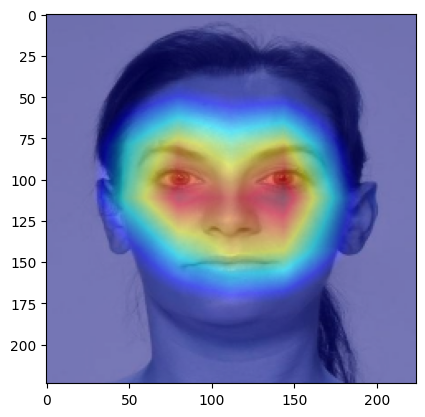

In [23]:
from keras.utils import img_to_array

#load image
test_img = img_test_image

#apply function

GradCAM_Heatmap = VizGradCAM(model, img_to_array(test_img), plot_results=True)

# **CLASS ACTIVATION MAP(CAM)**

In [24]:
from keras import backend as K
import scipy

In [25]:
def get_class_activation_map(model, img):
    
    # expand dimension to fit the image to a network accepted input size
    img = np.expand_dims(img, axis=0)

    # predict to get the winning class
    predictions = model.predict(img)
    label_index = np.argmax(predictions)

    # Get the 2048 input weights to the softmax of the winning class.
    class_weights = model.layers[-1].get_weights()[0]
    class_weights_winner = class_weights[:, label_index]
    
    # get the final conv layer
    final_conv_layer = model.get_layer("top_conv")
    
    # create a function to fetch the final conv layer output maps (should be shape (1, 7, 7, 2048)) 
    get_output = K.function([model.layers[0].input],[final_conv_layer.output, model.layers[-1].output])
    [conv_outputs, predictions] = get_output([img])
    
    # squeeze conv map to shape image to size (7, 7, 1280)
    conv_outputs = np.squeeze(conv_outputs)
    
    # bilinear upsampling to resize each filtered image to size of original image 
    mat_for_mult = scipy.ndimage.zoom(conv_outputs, (32, 32, 1), order=1) # dim: 224 x 224 x 1280


    # get class activation map for object class that is predicted to be in the image
    print(mat_for_mult.shape)
    final_output = np.dot(mat_for_mult.reshape((224*224, 1280)), class_weights_winner).reshape(224,224) # dim: 224 x 224
    
    # return class activation map
    # print(img.shape)
    # print(final_output.shape)
    superimposed_img = final_output+img[0][:,:,0]
    plt.imshow(superimposed_img)

    return final_output

1/1 [==============================] - 0s 28ms/step
(224, 224, 1280)


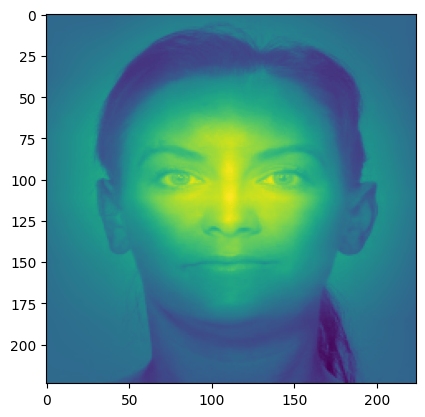

In [26]:
#Output for CAM

CAM_Heatmap = get_class_activation_map(model,img_test_image)

# **Saliency Map**

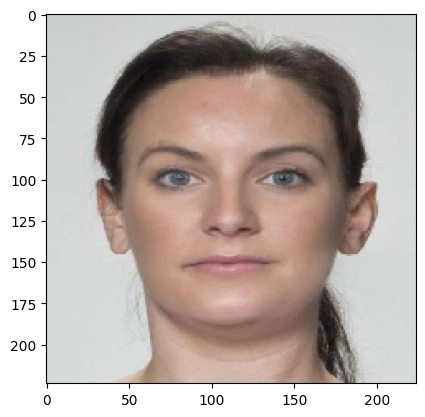

In [28]:
#Load image
from keras.utils import load_img

_img = load_img("/content/drive/MyDrive/LARGE_DATASET/train/morphed/011_03_014_03_alpha0.5_combined_morph_q64.jpg",target_size=(224,224))
plt.imshow(_img)
plt.show()

In [29]:
# Preprocess image to get it into the right format for the model
img = img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)

1/1 [==============================] - 0s 73ms/step


In [30]:
# Calculate the gradient with respect to the top class score to see which pixels in the image contribute the most
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [31]:
dgrad_abs = tf.math.abs(grads)

In [32]:
#Find the max of the absolute values of the gradient along each RGB channel
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

In [33]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

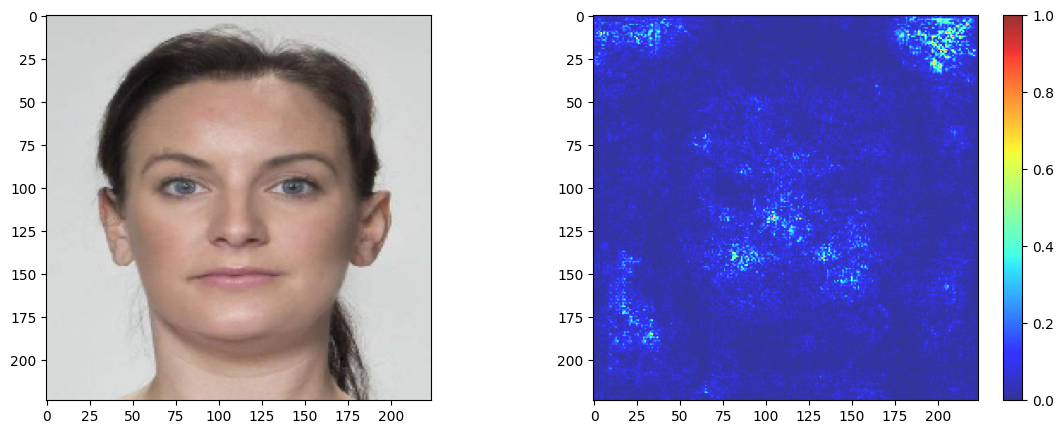

In [34]:
#Output For Saliency
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

#**Ensemble Model**

Explainable AI methods like CAM, GRAD-CAM, and Saliency Map allow us to visualise the model in 2 ways. The first method is to simply analyze an input and see which feature gain preference in classification. Building an Ensemble of CAM and GRAD-CAM we can easily see which feature of the face are preferred while determining if the image is morphed or not.
This is implemented below as an example.

In [35]:
print(GradCAM_Heatmap.shape)
gradcam_heatmap_flatten = GradCAM_Heatmap.reshape((150528, ))
print(gradcam_heatmap_flatten.shape)

(224, 224, 3)
(150528,)


In [36]:
print(CAM_Heatmap.shape)
CAM_Heatmap_flatten = CAM_Heatmap.reshape((50176, ))
print(CAM_Heatmap_flatten.shape)

(224, 224)
(50176,)


In [37]:
print(grad_eval.shape)
saliencymap_heatmap_flatten = grad_eval.reshape((50176, ))
print(saliencymap_heatmap_flatten.shape)

(224, 224)
(50176,)


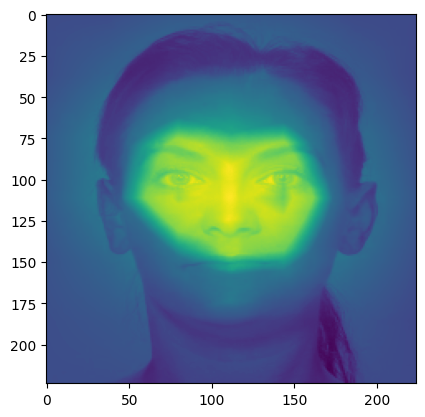

In [38]:
super_img = GradCAM_Heatmap[:,:,0]+ CAM_Heatmap + grad_eval + img_test_image[:,:,0] 
plt.imshow(super_img)